In [2]:
import os
import zipfile

local_zip = '/home/kushal/Documents/ML/100-bird-species.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

In [3]:
ALBATROSS_DIR = os.path.join('/home/kushal/Documents/ML/175/train/ALBATROSS')
ALEXANDRINE_PARAKEET_DIR = os.path.join('/home/kushal/Documents/ML/175/train/ALEXANDRINE PARAKEET')
AMERICAN_AVOCET_DIR = os.path.join('/home/kushal/Documents/ML/175/train/AMERICAN AVOCET')
AMERICAN_BITTERN_DIR = os.path.join('/home/kushal/Documents/ML/175/train/AMERICAN BITTERN')
AMERICAN_COOT_DIR = os.path.join('/home/kushal/Documents/ML/175/train/AMERICAN COOT')
AMERICAN_GOLDFINCH_DIR = os.path.join('/home/kushal/Documents/ML/175/train/AMERICAN GOLDFINCH')

In [4]:
ALBATROSS_FILES = os.listdir(ALBATROSS_DIR)
ALEXANDRINE_PARAKEET_FILES = os.listdir(ALEXANDRINE_PARAKEET_DIR)
AMERICAN_AVOCET_FILES = os.listdir(AMERICAN_AVOCET_DIR)
AMERICAN_BITTERN_FILES = os.listdir(AMERICAN_BITTERN_DIR)
AMERICAN_COOT_FILES = os.listdir(AMERICAN_COOT_DIR)
AMERICAN_GOLDFINCH_FILES = os.listdir(AMERICAN_GOLDFINCH_DIR)
ALBATROSS_FILES

['046.jpg',
 '027.jpg',
 '019.jpg',
 '021.jpg',
 '037.jpg',
 '091.jpg',
 '073.jpg',
 '003.jpg',
 '013.jpg',
 '026.jpg',
 '063.jpg',
 '067.jpg',
 '033.jpg',
 '016.jpg',
 '056.jpg',
 '066.jpg',
 '043.jpg',
 '002.jpg',
 '048.jpg',
 '028.jpg',
 '088.jpg',
 '032.jpg',
 '012.jpg',
 '083.jpg',
 '047.jpg',
 '054.jpg',
 '014.jpg',
 '009.jpg',
 '092.jpg',
 '097.jpg',
 '030.jpg',
 '075.jpg',
 '045.jpg',
 '029.jpg',
 '095.jpg',
 '041.jpg',
 '015.jpg',
 '031.jpg',
 '096.jpg',
 '052.jpg',
 '068.jpg',
 '034.jpg',
 '060.jpg',
 '061.jpg',
 '017.jpg',
 '040.jpg',
 '079.jpg',
 '080.jpg',
 '008.jpg',
 '090.jpg',
 '022.jpg',
 '035.jpg',
 '089.jpg',
 '078.jpg',
 '039.jpg',
 '093.jpg',
 '076.jpg',
 '050.jpg',
 '010.jpg',
 '042.jpg',
 '036.jpg',
 '064.jpg',
 '023.jpg',
 '077.jpg',
 '059.jpg',
 '074.jpg',
 '006.jpg',
 '024.jpg',
 '094.jpg',
 '038.jpg',
 '025.jpg',
 '086.jpg',
 '005.jpg',
 '087.jpg',
 '072.jpg',
 '053.jpg',
 '007.jpg',
 '085.jpg',
 '084.jpg',
 '044.jpg',
 '055.jpg',
 '098.jpg',
 '020.jpg',
 '06

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 8

NEXT_ALBATROSS = [os.path.join(ALBATROSS_DIR, fname)
                      for fname in ALBATROSS_FILES[pic_index - 8 : pic_index]]
NEXT_ALEXANDRINE_PARAKEET = [os.path.join(ALEXANDRINE_PARAKEET_DIR, fname)
                      for fname in ALEXANDRINE_PARAKEET_FILES[pic_index - 8 : pic_index]]
NEXT_AVOCET = [os.path.join(AMERICAN_AVOCET_DIR, fname)
                      for fname in AMERICAN_AVOCET_FILES[pic_index - 8 : pic_index]]
NEXT_AMERICAN_BITTERN = [os.path.join(AMERICAN_BITTERN_DIR, fname)
                      for fname in AMERICAN_BITTERN_FILES[pic_index - 8 : pic_index]]
NEXT_AMERICAN_COOT = [os.path.join(AMERICAN_COOT_DIR, fname)
                      for fname in AMERICAN_COOT_FILES[pic_index - 8 : pic_index]]
NEXT_AMERICAN_GOLDFINCH = [os.path.join(AMERICAN_GOLDFINCH_DIR, fname)
                      for fname in AMERICAN_GOLDFINCH_FILES[pic_index - 8 : pic_index]]

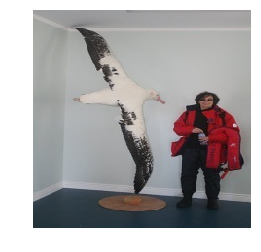

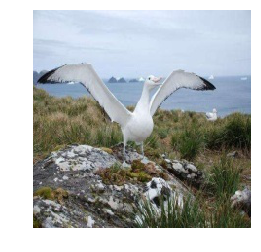

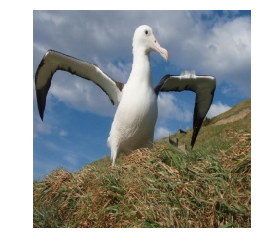

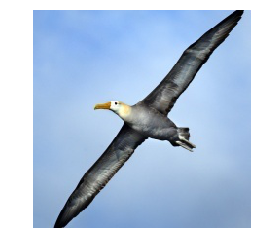

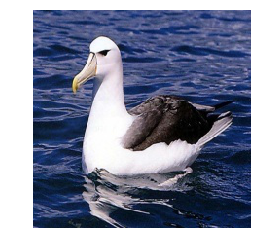

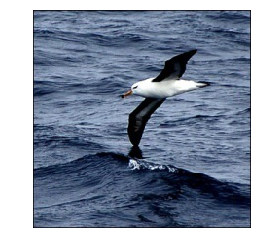

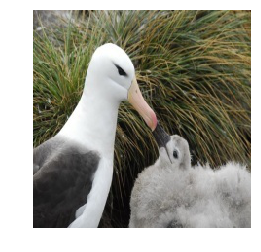

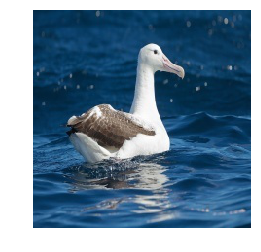

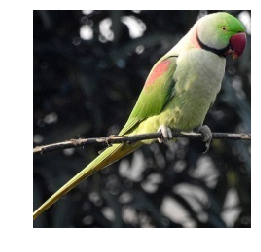

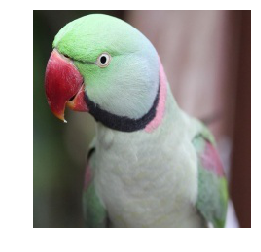

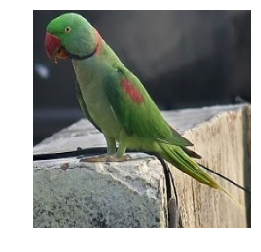

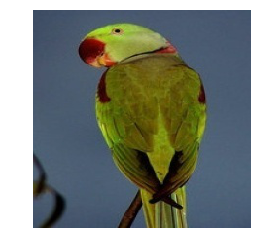

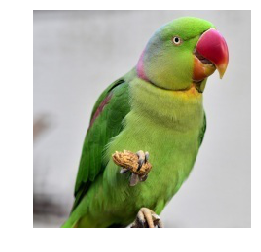

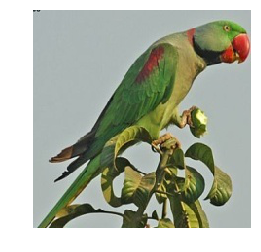

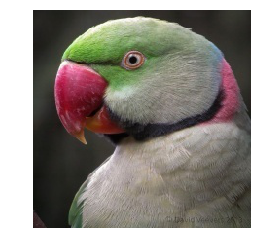

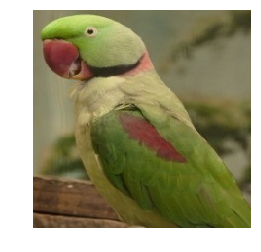

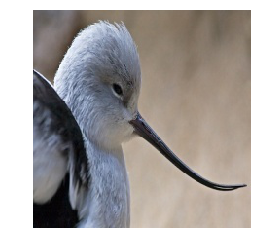

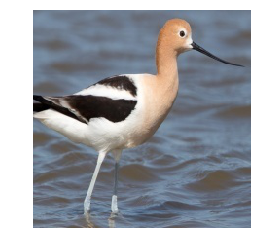

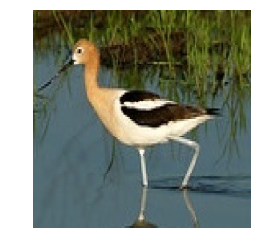

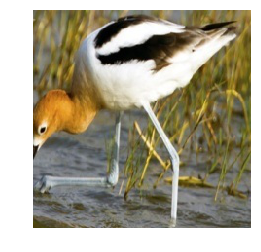

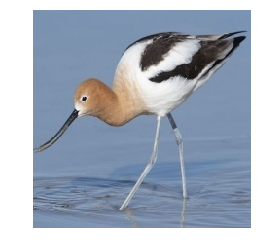

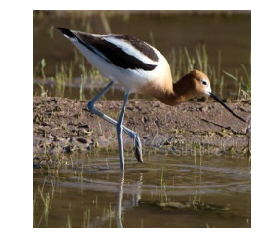

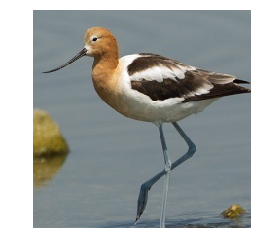

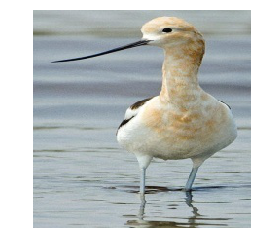

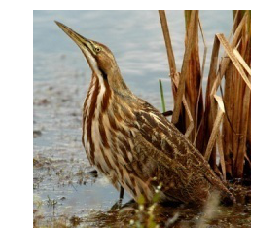

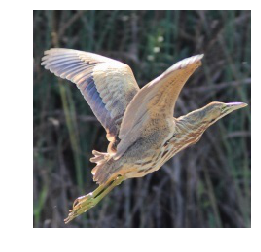

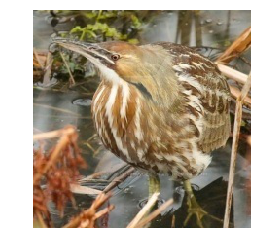

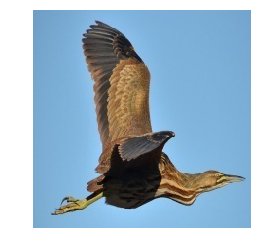

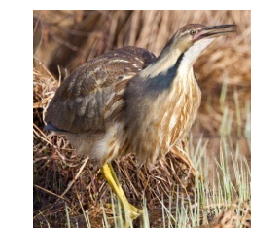

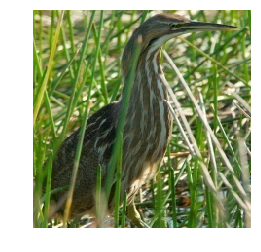

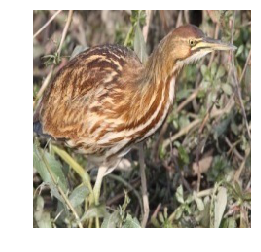

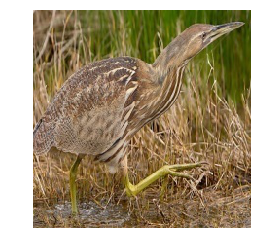

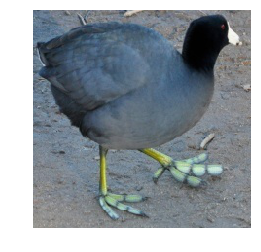

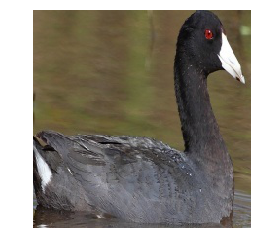

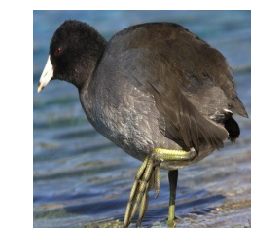

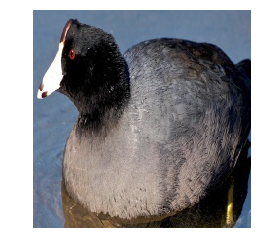

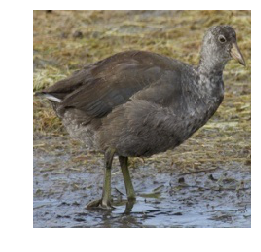

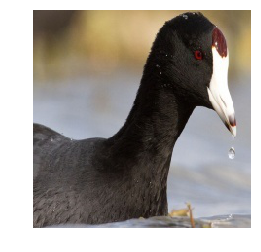

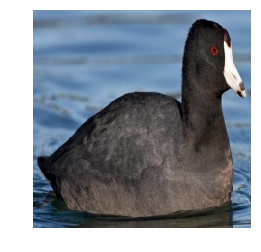

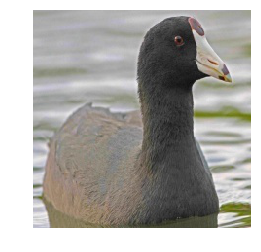

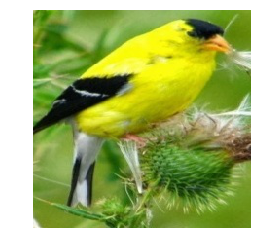

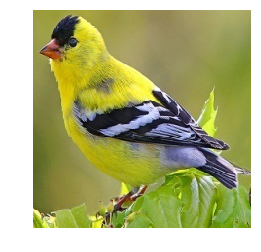

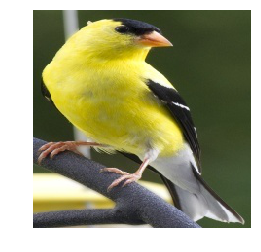

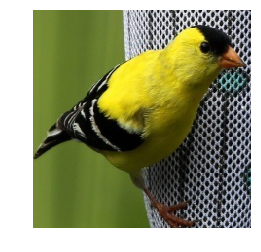

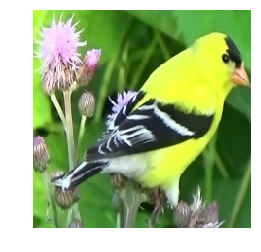

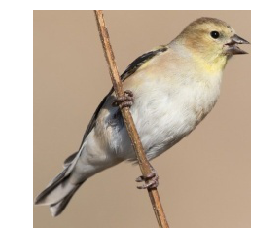

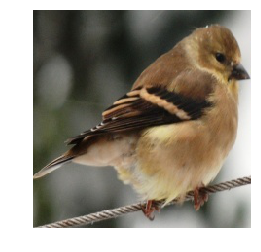

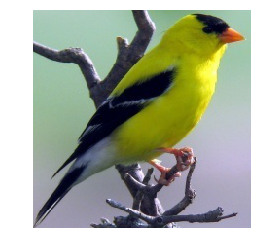

In [6]:
for i, img_path in enumerate(NEXT_ALBATROSS + NEXT_ALEXANDRINE_PARAKEET + NEXT_AVOCET + NEXT_AMERICAN_BITTERN + NEXT_AMERICAN_COOT + NEXT_AMERICAN_GOLDFINCH):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [7]:
import tensorflow as tf
import keras_preprocessing 
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/home/kushal/Documents/ML/175/train'
training_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

VALIDATION_DIR = '/home/kushal/Documents/ML/175/valid'
vaidation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size=(150, 150), class_mode='categorical')

validation_generator = vaidation_datagen.flow_from_directory(
                VALIDATION_DIR,
                target_size=(150, 150),
                class_mode='categorical'
)


Found 23657 images belonging to 175 classes.
Found 875 images belonging to 175 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(175, activation='softmax')
    
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)


Epoch 1/15
740/740 [==============================] - 633s 856ms/step - loss: 4.6889 - acc: 0.0502 - val_loss: 3.6317 - val_acc: 0.1543
Epoch 2/15
740/740 [==============================] - 629s 850ms/step - loss: 3.7655 - acc: 0.1613 - val_loss: 3.0828 - val_acc: 0.2549
Epoch 3/15
740/740 [==============================] - 659s 890ms/step - loss: 3.3182 - acc: 0.2401 - val_loss: 2.3706 - val_acc: 0.4000
Epoch 4/15
740/740 [==============================] - 637s 861ms/step - loss: 3.0370 - acc: 0.2911 - val_loss: 2.2118 - val_acc: 0.4400
Epoch 5/15
740/740 [==============================] - 690s 933ms/step - loss: 2.8629 - acc: 0.3321 - val_loss: 2.0032 - val_acc: 0.5189
Epoch 6/15
740/740 [==============================] - 757s 1s/step - loss: 2.7388 - acc: 0.3573 - val_loss: 2.0605 - val_acc: 0.4926
Epoch 7/15
740/740 [==============================] - 759s 1s/step - loss: 2.6646 - acc: 0.3740 - val_loss: 2.1652 - val_acc: 0.4869
Epoch 8/15
740/740 [==============================] - 

In [ ]:
model.save("rps.h5")


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches =  range(len(acc))
plt.plot(epoches, acc, 'r', label='Training Accuracy')
plt.plot(epoches, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=5)
plt.figure()
plt.show()


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

classes = model.predict(NEXT_AMERICAN_COOT[0], batch_size=10)
print(classes)

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()
# for fn in uploaded.keys():
#     path = fn
#     img = image.load_img(path, target_size(150,150))
#     x = image.image_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
#     classes = model.predict(images, batch_size=10)
#     print(fn)
#     print(classes)
    